In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
#pd.options.display.float_format = '{:.3f}'.format
import time

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Research Questions

- What variables are best at predicting Human Activity?
- Can models accurately predict human activity?
- What modela are most accurate?
- Verify if all column variables are unique.
- Verify and abnormalities in dataset (eg., Nan, blanks, inf., -, or any other unnecessary symbols).
- Check if the training dataset is balanced. 
- Investigate correlation among independent variables. 
- Investigate variable importance among independent variables, disgarding any irrevelant independent variables. 

In [2]:
samsung_test_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\test.csv')
samsung_train_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\train.csv')


In [3]:
#30% of data

samsung_test_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
samsung_test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [5]:
print('Shape of the test data {}'.format(samsung_test_data.shape))
print('Shape of the Train data {}'.format(samsung_train_data.shape))


Shape of the test data (2947, 563)
Shape of the Train data (7352, 563)


In [6]:
samsung_train_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
#for column in samsung_train_data.columns:
 #   print(column)

In [8]:
#Inspecting the number of columns and rows in the dataset
samsung_train_data.shape

(7352, 563)

In [9]:
#Checking for duplicate columns
len(set(samsung_train_data.columns))

563

In [10]:
set(samsung_train_data.columns.symmetric_difference(samsung_test_data.columns))

set()

In [11]:
set(samsung_train_data.columns).symmetric_difference(set(samsung_test_data.columns))

set()

In [12]:
# Counting nulls in the dataset 
null_count = samsung_train_data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

The inspection returned zero duplicate columns and no null values

In [13]:
#for column in samsung_train_data.columns:
#    print(column)



In [14]:
samsung_train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [15]:
samsung_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [16]:
np.dtype(samsung_train_data['subject'])


dtype('int64')

In [17]:
np.dtype(samsung_train_data['Activity'])


dtype('O')

In [18]:
#samsung_train_data.dtypes

In [19]:
np.unique(samsung_train_data['Activity'])

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [20]:
#Training variables with subject dropped and the outcome variable removed
#X Values
samsung_train_data.drop(['subject','Activity'], 1).head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
#Activity will be the y value 
#The X Values will be used to predict what activity the user is doing. 
samsung_train_data['Activity'].head()
y_train = samsung_train_data['Activity']

In [22]:
#Activity will be the y value 
#The X Values will be used to predict what activity the user is doing. 
samsung_train_data['Activity'].head()
X_train = samsung_train_data.drop(['subject','Activity'], 1)


In [23]:
#Test variables with subject dropped and the outcome variable removed

#X Values

X_test = samsung_test_data.drop(['subject','Activity'], 1)

samsung_test_data.drop(['subject','Activity'], 1).head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [24]:
#the y values will be tested against the training set

#Activity will be the y value 

#The X Values will be used to predict what activity the user is doing. 
y_test = samsung_test_data['Activity']

### Check the Data for Balance

In [25]:
(samsung_train_data['Activity'].value_counts()/ len(samsung_train_data)).T

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

## Random Forest Classifier

In [67]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc1 = ensemble.RandomForestClassifier(random_state=42)
rfc1.fit(X_train,y_train)
cv1 = cross_val_score(rfc1, X_train, y_train, cv=5)

print("---RFC takes %s seconds ---" % (time.time() - start_time))

#Test
y_true, y_pred = y_test, rfc1.predict(X_test)
print(classification_report(y_true, y_pred))

print(cv1)
print("mean = {:.3}".format(cv1.mean()))

---RFC takes 4.770235776901245 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.88      0.89       491
          STANDING       0.89      0.90      0.90       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.93      0.85      0.89       420
  WALKING_UPSTAIRS       0.89      0.83      0.86       471

       avg / total       0.91      0.91      0.91      2947

[0.89145183 0.89734874 0.9122449  0.90605854 0.93051771]
mean = 0.908


## Variable Importance

In [68]:
#Creating a dataframe to examine the tresholds need to run new RFCs

feature_importances = pd.DataFrame(rfc1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

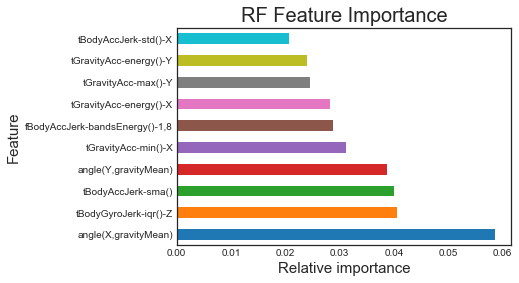

In [81]:
feature_graph = feature_importances['importance'].nlargest(10)
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title("RF Feature Importance", fontsize=20)
feature_graph.plot.barh()

In [93]:
rfc1.feature_importances_

array([1.99928346e-04, 1.92248401e-04, 2.00134294e-04, 3.54696055e-04,
       1.71482635e-04, 1.19170059e-04, 1.27875022e-03, 4.76059954e-04,
       2.42459385e-04, 1.25537522e-02, 1.18126077e-04, 1.01202588e-04,
       3.28026513e-04, 3.83171547e-04, 6.28111720e-04, 2.67814336e-04,
       8.92403593e-03, 5.35824579e-04, 6.49867164e-04, 2.10001091e-04,
       2.72501719e-04, 4.35080818e-04, 2.60426591e-03, 2.83807010e-04,
       5.74791114e-04, 1.96618444e-04, 1.91572662e-04, 1.46682937e-04,
       4.75872517e-04, 7.73120591e-04, 8.90109613e-05, 1.30063927e-04,
       1.20514978e-04, 3.45893213e-04, 3.63285464e-04, 1.79621758e-04,
       1.53448237e-04, 3.82601912e-03, 1.34873201e-03, 9.57536950e-04,
       1.31208599e-02, 1.82339795e-02, 4.06329321e-03, 1.70035399e-04,
       2.44737495e-04, 9.07651579e-05, 1.75034955e-04, 2.54489688e-04,
       6.04101946e-05, 1.21792901e-02, 2.44955767e-02, 5.45286257e-03,
       3.11527798e-02, 1.80088122e-02, 3.68023722e-03, 5.94327292e-03,
      

In [94]:
clf.feature_importances_

array([1.10052336e-03, 2.09122897e-03, 7.98858370e-04, 0.00000000e+00,
       1.81128443e-04, 1.10317618e-04, 2.69446352e-04, 3.32161950e-04,
       1.14146693e-03, 7.29318565e-03, 0.00000000e+00, 4.72927222e-04,
       1.53947480e-03, 1.88568192e-04, 9.70452136e-04, 2.22182894e-04,
       1.04134855e-03, 2.06868877e-04, 4.50553810e-04, 1.45538764e-03,
       1.40368320e-04, 1.15032248e-03, 8.37661092e-03, 1.71712506e-03,
       2.05979307e-03, 8.32913999e-04, 0.00000000e+00, 0.00000000e+00,
       4.32716026e-03, 0.00000000e+00, 1.55800997e-04, 7.06363380e-04,
       3.79197601e-03, 9.48704771e-04, 1.53492246e-03, 3.97617988e-04,
       1.09493347e-03, 1.05461633e-02, 1.64201218e-03, 2.76054373e-03,
       1.83828683e-03, 4.47940751e-03, 4.02630011e-03, 2.10981172e-03,
       1.45381937e-04, 2.88147807e-04, 3.26104459e-03, 0.00000000e+00,
       1.33860284e-04, 1.54295174e-03, 9.95437548e-03, 1.33582263e-02,
       2.76216035e-02, 1.37262443e-02, 3.65631143e-03, 4.68146310e-03,
      

## Training the top 20 Features

In [31]:
#change to 19
feature_importances['importance'][:19].min()

0.016782303422232137

In [32]:
#feature_importances['importance'][:20]

In [33]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t20 = SelectFromModel(rfc1, threshold=0.016782303422232137)

# Train the selector
sfm_t20.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.016782303422232137)

In [34]:
X_important_train_t20 = sfm_t20.transform(X_train)
X_important_test_t20 = sfm_t20.transform(X_test)

In [35]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t20 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t20.fit(X_important_train_t20,y_train)
cv_important_t20 = cross_val_score(rfc_important_t20, X_important_train_t20, y_train, cv=5)

print("---RFC top 20 features takes %s seconds ---" % (time.time() - start_time))

#Test

"""y_true, y_pred = y_test, rfc1.predict(X_test)
print(classification_report(y_true, y_pred))
"""
y_true, y_pred = y_test, rfc_important_t20.predict(X_important_test_t20)
print(classification_report(y_true, y_pred))

print(cv_important_t20)
print("mean = {:.3}".format(cv_important_t20.mean()))

---RFC top 20 features takes 1.0741245746612549 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.77      0.77      0.77       491
          STANDING       0.79      0.79      0.79       532
           WALKING       0.75      0.83      0.79       496
WALKING_DOWNSTAIRS       0.86      0.80      0.83       420
  WALKING_UPSTAIRS       0.80      0.76      0.78       471

       avg / total       0.83      0.83      0.83      2947

[0.84464043 0.85384092 0.86394558 0.88495575 0.91825613]
mean = 0.873


## Training the top 50 features

In [36]:
#These are the top 50 features most important to the random forest classifier
#include runtime

feature_importances['importance'][:49].min()

0.0039092083932506065

In [37]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t50 = SelectFromModel(rfc1, threshold=0.0039092083932506065)

# Train the selector
sfm_t50.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0039092083932506065)

In [38]:
X_important_train_t50 = sfm_t50.transform(X_train)
X_important_test_t50 = sfm_t50.transform(X_test)

In [39]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t50 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t50.fit(X_important_train_t50,y_train)
cv_important_t50 = cross_val_score(rfc_important_t50, X_important_train_t50, y_train, cv=5)



print("---RFC top 50 features takes %s seconds ---" % (time.time() - start_time))

y_true, y_pred = y_test, rfc_important_t50.predict(X_important_test_t50)
print(classification_report(y_true, y_pred))

print(cv_important_t50)
print("mean = {:.3}".format(cv_important_t50.mean()))

---RFC top 50 features takes 1.7473304271697998 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.77      0.81       491
          STANDING       0.81      0.87      0.84       532
           WALKING       0.85      0.92      0.88       496
WALKING_DOWNSTAIRS       0.91      0.85      0.88       420
  WALKING_UPSTAIRS       0.84      0.82      0.83       471

       avg / total       0.88      0.87      0.87      2947

[0.86770692 0.88647179 0.87210884 0.9128659  0.92711172]
mean = 0.893


## Training the top 100 features

In [40]:
#Finding the Treshold of the top 100 features

print(feature_importances['importance'][:99].min())

0.0012467118900411059


In [41]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t100 = SelectFromModel(rfc1, threshold=0.0012467118900411059)

# Train the selector
sfm_t100.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0012467118900411059)

In [42]:
X_important_train_t100 = sfm_t100.transform(X_train)
X_important_test_t100 = sfm_t100.transform(X_test)

In [43]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t100 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t100.fit(X_important_train_t100,y_train)
cv_important_t100 = cross_val_score(rfc_important_t100, X_important_train_t100, y_train, cv=5)


print("---RFC top 100 features takes %s seconds ---" % (time.time() - start_time))


y_true, y_pred = y_test, rfc_important_t100.predict(X_important_test_t100)
print(classification_report(y_true, y_pred))

print(cv_important_t100)
print("mean = {:.5}".format(cv_important_t100.mean()))

---RFC top 100 features takes 1.8121798038482666 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.88      0.88       491
          STANDING       0.89      0.88      0.89       532
           WALKING       0.85      0.96      0.90       496
WALKING_DOWNSTAIRS       0.93      0.85      0.89       420
  WALKING_UPSTAIRS       0.88      0.83      0.85       471

       avg / total       0.91      0.90      0.90      2947

[0.90027137 0.87151598 0.88979592 0.92784207 0.92370572]
mean = 0.90263


## Training the top 200 features

In [44]:
#Finding the Treshold of the top 200 features

print(feature_importances['importance'][:199].min())

0.0004974809505637701


In [45]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t200 = SelectFromModel(rfc1, threshold=0.0004974809505637701)

# Train the selector
sfm_t200.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0004974809505637701)

In [46]:
X_important_train_t200 = sfm_t200.transform(X_train)
X_important_test_t200 = sfm_t200.transform(X_test)

In [47]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t200 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t200.fit(X_important_train_t200,y_train)
cv_important_t200 = cross_val_score(rfc_important_t200, X_important_train_t200, y_train, cv=5)


print("---RFC top 200 features takes %s seconds ---" % (time.time() - start_time))
#Test

y_true, y_pred = y_test, rfc_important_t200.predict(X_important_test_t200)
print(classification_report(y_true, y_pred))

print(cv_important_t200)
print("mean = {:.5}".format(cv_important_t200.mean()))

---RFC top 200 features takes 2.787538528442383 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.86      0.88       491
          STANDING       0.87      0.92      0.90       532
           WALKING       0.88      0.95      0.92       496
WALKING_DOWNSTAIRS       0.95      0.84      0.89       420
  WALKING_UPSTAIRS       0.87      0.89      0.88       471

       avg / total       0.92      0.91      0.91      2947

[0.89484396 0.88851122 0.89387755 0.92375766 0.94277929]
mean = 0.90875


## Training the top 300 features

In [48]:
#Finding the Treshold of the top 300 features

print(feature_importances['importance'][:299].min())

0.0002687968609794586


In [49]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t300 = SelectFromModel(rfc1, threshold=0.0002687968609794586)

# Train the selector
sfm_t300.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0002687968609794586)

In [50]:
X_important_train_t300 = sfm_t300.transform(X_train)
X_important_test_t300 = sfm_t300.transform(X_test)

In [51]:
from sklearn.metrics import classification_report

#RANDOM STATE, Seed values put in when done
start_time = time.time()
rfc_important_t300 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t300.fit(X_important_train_t300,y_train)
cv_important_t300 = cross_val_score(rfc_important_t300, X_important_train_t300, y_train, cv=5)


print("---RFC top 300 features %s seconds ---" % (time.time() - start_time))

#Test

y_true, y_pred = y_test, rfc_important_t300.predict(X_important_test_t300)
print(classification_report(y_true, y_pred))

print(cv_important_t300)
print("mean = {:.5}".format(cv_important_t300.mean()))





---RFC top 300 features 3.4088783264160156 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.87      0.87       491
          STANDING       0.88      0.87      0.88       532
           WALKING       0.85      0.95      0.90       496
WALKING_DOWNSTAIRS       0.90      0.82      0.86       420
  WALKING_UPSTAIRS       0.86      0.82      0.84       471

       avg / total       0.89      0.89      0.89      2947

[0.88263229 0.8946295  0.90612245 0.9149081  0.9400545 ]
mean = 0.90767


## Gradient Boosting Classifier

In [86]:

start_time = time.time()
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'random_state': 42,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)


clf_cv = cross_val_score(clf, X_train, y_train, cv=5)

print("---Gradient Boosting Classifier %s seconds ---" % (time.time() - start_time))
#Test
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

print(cv1)
print("mean = {:.3}".format(cv1.mean()))

---Gradient Boosting Classifier 1506.4143109321594 seconds ---
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.89      0.91       491
          STANDING       0.90      0.94      0.92       532
           WALKING       0.94      0.97      0.96       496
WALKING_DOWNSTAIRS       0.98      0.93      0.96       420
  WALKING_UPSTAIRS       0.92      0.94      0.93       471

       avg / total       0.95      0.95      0.95      2947

[0.89145183 0.89734874 0.9122449  0.90605854 0.93051771]
mean = 0.908


In [87]:
#Creating a dataframe to examine the tresholds need to run new RFCs

GB_feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

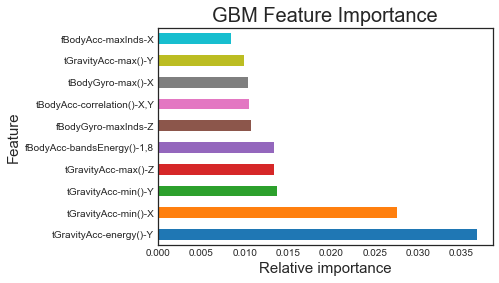

In [88]:
GB_feature_graph = GB_feature_importances['importance'].nlargest(10)
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title("GBM Feature Importance", fontsize=20)
GB_feature_graph.plot.barh()

In [89]:
clf.n_outputs_ 

AttributeError: 'GradientBoostingClassifier' object has no attribute 'n_outputs_'

## Support Vector Classifier Run with top performing RFC vars

In [55]:
from sklearn.metrics import confusion_matrix
start_time = time.time()
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

print("Report:")
y_true, y_pred = y_test, svm.predict(X_test)
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

print("---SVM %s seconds ---" % (time.time() - start_time))

Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.89      0.92       491
          STANDING       0.91      0.97      0.94       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.98      0.98       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

       avg / total       0.96      0.96      0.96      2947

---SVM 4.152885437011719 seconds ---
